In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gpd
import heapq
import random
import timeit

import sys
sys.path.append('./../exploration') # this is where the magic is going down
sys.path.append('./..')

from intersections_and_roads import *
%matplotlib inline

In [2]:
# Read in the geolocation data
intersections = gpd.read_file('../cambridgegis_data_trans/Intersections/TRANS_Intersections.topojson')
street_centerline = gpd.read_file('../cambridgegis_data_trans/Street_Centerlines/TRANS_Centerlines.topojson')
intersection_graph = build_intersection_graph(intersections=intersections, street_centerline=street_centerline)

In [3]:
# randomly select a start and an end point on the graph for test
start = intersection_graph[np.random.choice(intersection_graph.keys())]
end = intersection_graph[np.random.choice(intersection_graph.keys())]
start, end

(<intersections_and_roads.node instance at 0x10d3be0e0>,
 <intersections_and_roads.node instance at 0x10d3ac998>)

In [4]:
# search the graph
route = a_star_search(start, end, intersection_graph)

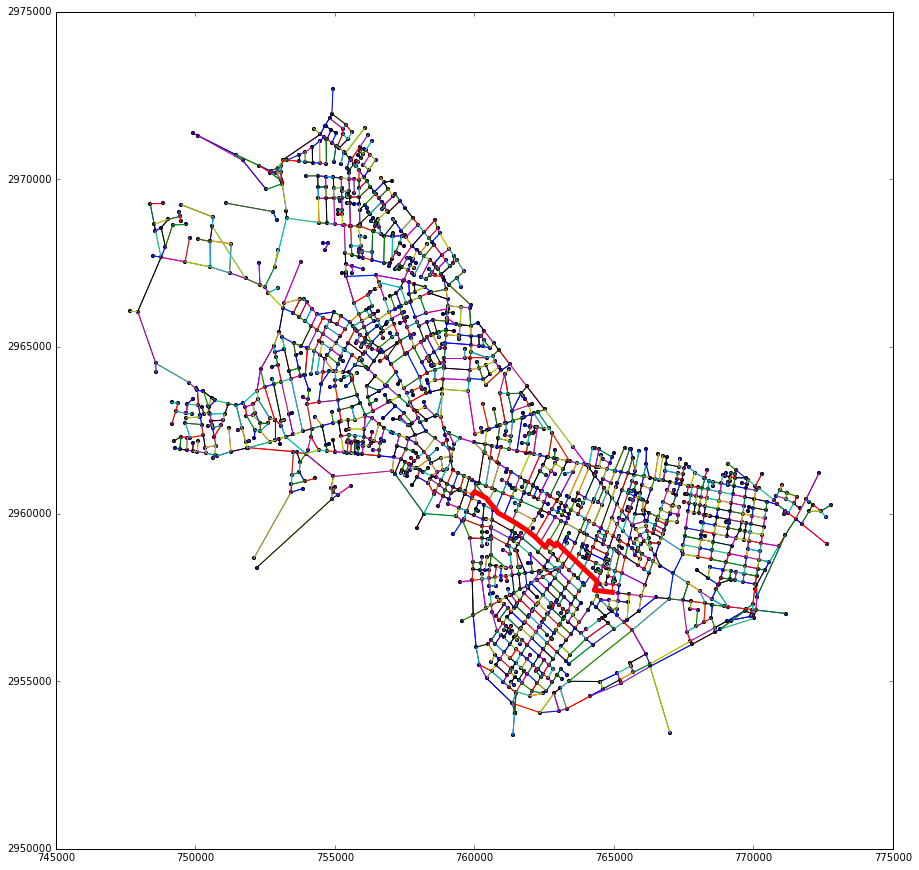

In [5]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))

xs = [intersection_graph[key].get_x_y()[0] for key in intersection_graph]
ys = [intersection_graph[key].get_x_y()[1] for key in intersection_graph]

for key in intersection_graph:
    node = intersection_graph[key]
    for connection in node.get_connections():
        child = intersection_graph[connection]
        line_x = [node.get_x_y()[0], child.get_x_y()[0]]
        line_y = [node.get_x_y()[1], child.get_x_y()[1]]
        ax.plot(line_x, line_y)

ax.scatter(xs, ys, s=10)

xs = [intersection_graph[node].get_x_y()[0] for node in route]
ys = [intersection_graph[node].get_x_y()[1] for node in route]

ax.plot(xs, ys, c='r', linewidth=5)
# for i, node in enumerate(route):
#     x,y = intersection_graph[node].get_x_y()
#     if i == 0:
#         ax.scatter(x, y, c='r', s=50)
#     elif i == len(route)-1:
#         ax.scatter(x, y, c='r', s=50)
#     else:
#         ax.scatter(x, y, c='b', s=50)
plt.show()

In [6]:
# timing for comparing heuristics down the line
def test():
#     start = intersection_graph[np.random.choice(intersection_graph.keys())]
#     end = intersection_graph[np.random.choice(intersection_graph.keys())]
    a_star_search(start, end, intersection_graph)

timeit.timeit("test()", setup="from __main__ import *", number=10)

<timeit-src>:2: SyntaxWarning: import * only allowed at module level


2.6170268058776855